#Lesson 08. Обучение без учителя в Scikit-learn.

##Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
target = boston["target"]
Y = pd.DataFrame(target, columns=["price"])

Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


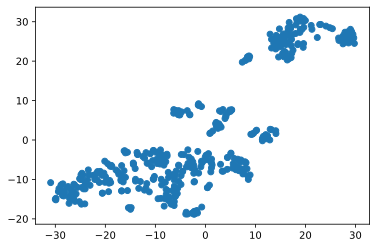

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

##Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
from sklearn.cluster import KMeans

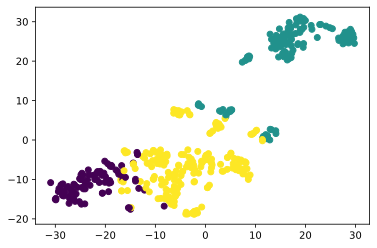

In [14]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [28]:
print('Первый кластер: ', Y_train[labels_train == 0].mean().values,'\n'
'Второй кластер:', Y_train[labels_train == 1].mean().values,'\n'
'Третий кластер:', Y_train[labels_train == 2].mean().values)

Первый кластер:  [27.78837209] 
Второй кластер: [16.16535433] 
Третий кластер: [24.95811518]


In [30]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean(),'\n'
'Второй кластер:', X_train['CRIM'][labels_train == 1].mean(),'\n'
'Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.07356558139534884 
Второй кластер: 10.797028425196851 
Третий кластер: 0.4216602094240837


##Задание 3 *

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [17]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [31]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

X_test_tsne

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 5.0197625 ,  3.5026448 ],
       [ 7.4992414 ,  0.6893409 ],
       [-1.193172  ,  1.2747434 ],
       [ 4.274786  ,  6.853519  ],
       [-3.2838748 , -0.6359859 ],
       [ 3.3329237 ,  4.375684  ],
       [ 3.3225222 ,  2.661191  ],
       [-0.2720887 ,  1.5618173 ],
       [-2.4586935 , -0.9269524 ],
       [ 2.569183  ,  2.9838974 ],
       [ 6.657275  , -0.10474753],
       [ 5.617243  ,  2.575429  ],
       [-6.4987187 , -1.3462882 ],
       [ 3.622064  ,  5.095051  ],
       [ 3.7266376 ,  3.817391  ],
       [-2.3100836 , -0.34536052],
       [ 0.73639625,  1.7580041 ],
       [-4.894347  , -1.8134887 ],
       [ 8.9870615 ,  6.4316616 ],
       [-3.620998  , -0.5876658 ],
       [ 5.913715  ,  6.140921  ],
       [ 6.8728104 ,  5.9980254 ],
       [ 2.79296   ,  1.8646281 ],
       [ 2.0444195 ,  3.8840384 ],
       [-3.9249754 , -0.5978049 ],
       [-3.7486129 , -1.4812883 ],
       [ 3.8003209 ,  5.911325  ],
       [-6.0818    ,  0.49802577],
       [ 6.7039065 ,